In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import seaborn as sns
import missingno as msno
import warnings
import os
from functools import lru_cache
from math import ceil
from itertools import zip_longest
from typing import List, Tuple, Union, Any
from scipy.stats import chi2_contingency
from itertools import combinations
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import r_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet 
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier  # Make sure CatBoost is imported
from lightgbm import LGBMClassifier
import statsmodels.api as sm
import lightgbm as lgb

In [2]:
data= pd.read_csv("Ames_HousePrice.csv")

In [3]:
data.shape

(2580, 82)

In [4]:
target_name = "SalePrice"
X, y = (
    data.drop(columns = [target_name, 'PID']),
    data[target_name]
)

Average R² score for default CatBoost: 0.9294
Average R² score for CatBoost with Ordered Boosting: 0.9213


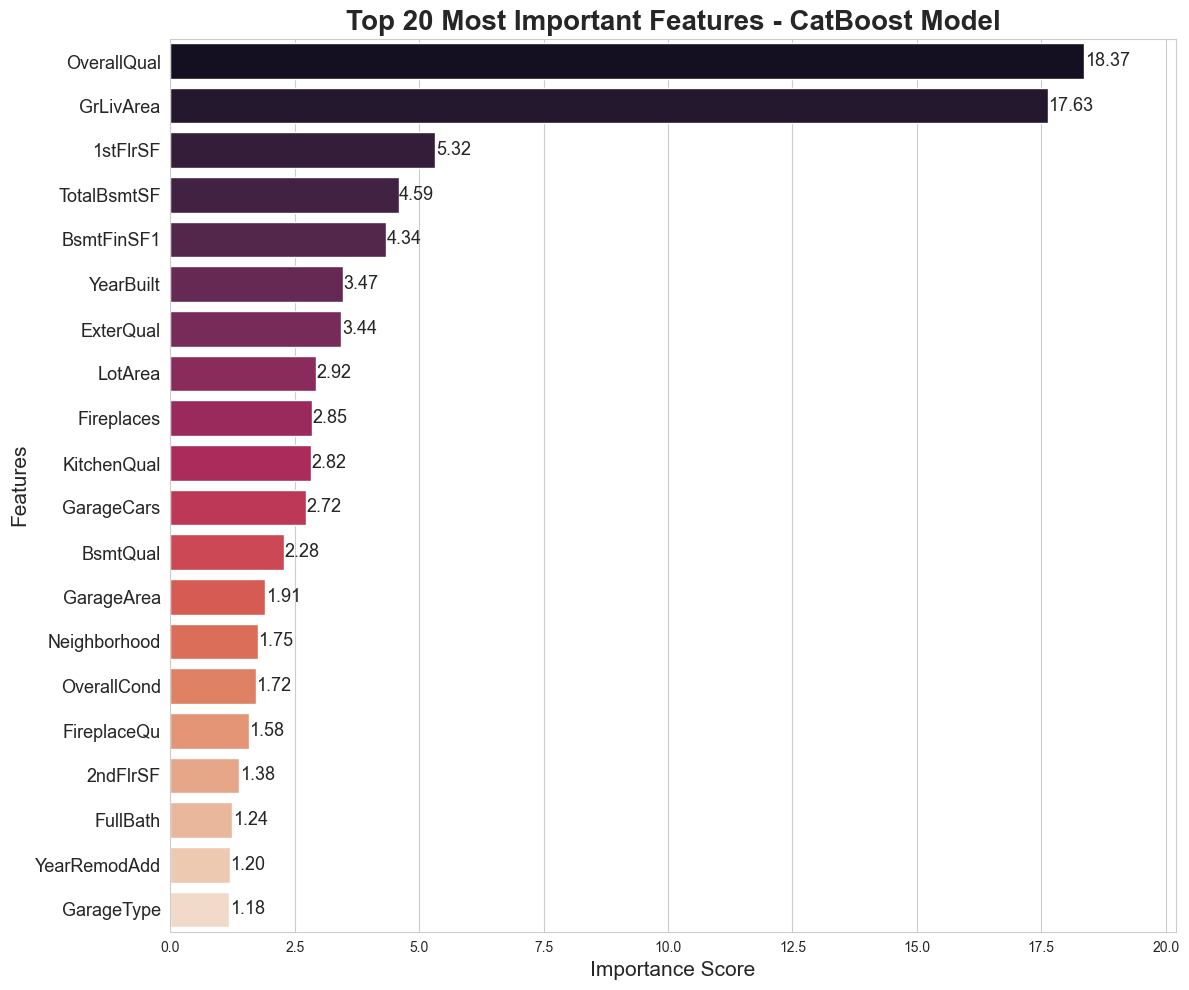

In [8]:
data= pd.read_csv("Ames_HousePrice.csv")
X=data.drop(['SalePrice'],axis=1)
y = data['SalePrice']
# Identify and fill NaNs in categorical columns
cat_features = [col for col in X.columns if X[col].dtype == 'object']
X[cat_features] = X[cat_features].fillna('Missing')
 
# Identify categorical columns
cat_features = X.select_dtypes(include=['object']).columns.tolist()
# Define and train the default CatBoost model
default_model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)
default_scores = cross_val_score(default_model, X, y, cv=5, scoring='r2')
print(f"Average R² score for default CatBoost: {default_scores.mean():.4f}")
 
# Define and train the CatBoost model with Ordered Boosting
ordered_model = CatBoostRegressor(cat_features=cat_features, random_state=42, 
                                  boosting_type='Ordered', verbose=0)
ordered_scores = cross_val_score(ordered_model, X, y, cv=5, scoring='r2')
print(f"Average R² score for CatBoost with Ordered Boosting: {ordered_scores.mean():.4f}")

# Set up K-fold cross-validation
kf = KFold(n_splits=5)
feature_importances = []
 
# Iterate over each split
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 
    # Train default CatBoost model
    model = CatBoostRegressor(cat_features=cat_features, random_state=42, verbose=0)
    model.fit(X_train, y_train)
    feature_importances.append(model.get_feature_importance())
 
# Average feature importance across all folds
avg_importance = np.mean(feature_importances, axis=0)
 
# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
 
# Sort and take the top 20 features
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)
 
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("rocket", len(top_features))
 
# Create the plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)
 
# Customize the plot
plt.title('Top 20 Most Important Features - CatBoost Model', fontsize=20, fontweight='bold')
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
 
# Add value labels to the end of each bar
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=13)
 
# Extend x-axis by 10% and feature names font size
plt.xlim(0, max(top_features['Importance']) * 1.1)
plt.yticks(fontsize=13)
 
# Adjust layout and display
plt.tight_layout()
plt.show()